In [5]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
#ADD YOUR DIRECTORY HERE
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/utils')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/models')

from utils.analysis import *
from utils.getters import * 
from utils.plotters import * 
from models_config.model_config_GSP import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "gender_data"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_2_args,
    gcn_student_lsp_ensamble_3_args,
    gcn_student_lsp_ensamble_4_args,
    gcn_student_lsp_ensamble_5_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [0,2,4,5]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=CV,
            dataset=dataset,
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_lsp_ensamble_2
[[0.9384722222222223, 0.00025889274691358056, 1], [0.9383333333333332, 0.0003453703703703699, 0], [0.9384722222222223, 0.00025889274691358056, 1], [0.9383333333333332, 0.0003453703703703699, 0], [0.9384722222222223, 0.00025889274691358056, 1]]
[[0.9444444444444444, 0.00037461419753086217, 0], [0.8927777777777777, 0.0002483796296296277, 1], [0.8927777777777777, 0.0002483796296296277, 1], [0.9444444444444444, 0.00037461419753086217, 0], [0.8927777777777777, 0.0002483796296296277, 1]]
[[0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1]]
[[0.9577777777777777, 0.0002234567901234572, 0], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1]]

In [9]:
import numpy as np
df_best_student = np.array(all_model_best_student)
df = []
for i in range(4):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(20, 5)

In [10]:
df_best_student = np.array(all_model_best_student)
df_var = []
for i in range(4):
    df_var.append(df_best_student[:, i, :, 1].flatten())
df_var = pd.DataFrame(np.array(df_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var_rep = df_var.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df_var_rep.index = index_values
df_var_rep.shape

(20, 5)

In [11]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(4):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [12]:
all_data_var = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(4):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [13]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(20, 5)

In [14]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_var.shape

(20, 5)

In [15]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)

df_rep = df.loc['weighted acc'].T
df_var_rep = df_var_rep.loc['weighted acc'].T
df_var_rep = np.sqrt(df_var_rep)

In [16]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
x_ticks = ['2', '3', '4', '5']
# Rename the columns using the new labels
df_acuracy.columns = x_ticks
df_rep.columns = x_ticks
df_var.columns = x_ticks
df_var_rep.columns = x_ticks
# Display the modified DataFrame
df_var

,2,3,4,5
0,0.004213,0.005999,0.009602,0.007251
1,0.003084,0.007322,0.004146,0.002374
2,0.005716,0.002912,0.002405,0.002883
3,0.003754,0.005351,0.003948,0.005817
4,0.004302,0.005628,0.005718,0.005009


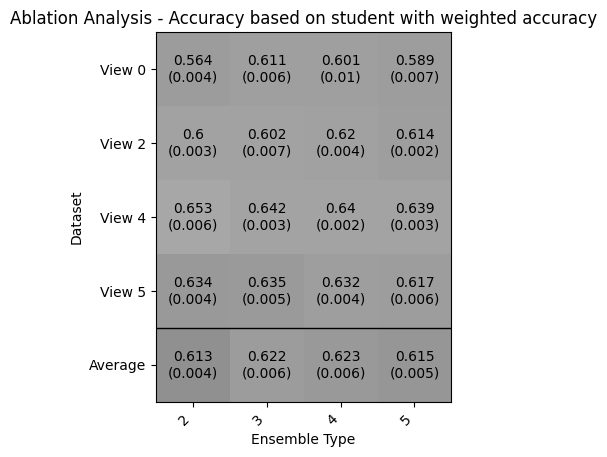

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [0, 1, 2, 3]
df_ordered = df_acuracy.iloc[:, column_order]
df_std_ordered = df_var.iloc[:, column_order]
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)
    
# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

plt.axhline(3.5, color='black', linewidth=1)  # Add a horizontal line on top of the "Average" row

plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['View 0', 'View 2', 'View 4', 'View 5', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['2', '3', '4', '5']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ablation Analysis - Accuracy based on student with weighted accuracy')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

plt.show()


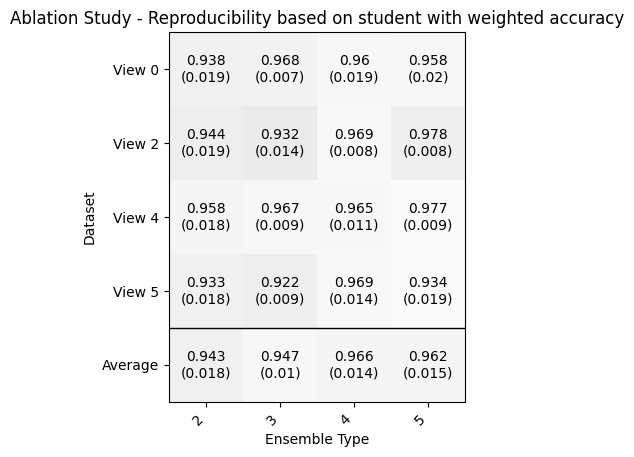

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [0, 1, 2, 3]
df_ordered = df_rep.iloc[:, column_order]
df_std_ordered = df_var_rep.iloc[:, column_order]
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

plt.axhline(3.5, color='black', linewidth=1)  # Add a horizontal line on top of the "Average" row

plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['View 0', 'View 2', 'View 4', 'View 5', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['2', '3', '4', '5']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ablation Study - Reproducibility based on student with weighted accuracy')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

plt.show()

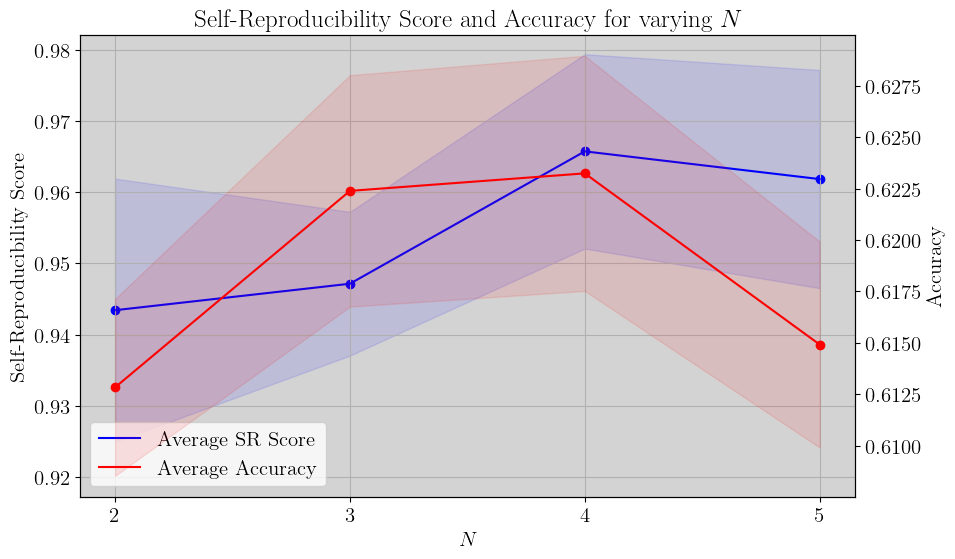

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 15,
    'font.family' : 'lmodern'
}
plt.rcParams.update(params)

# Two example lists with different y-values
list1 = df_ordered.iloc[-1].tolist()
list2 = df_acuracy.iloc[:, column_order].iloc[-1].tolist()

# Create x-axis values (assuming the lists have the same length)
x = ['2', '3', '4', '5']

# Create the figure and the first y-axis (left-hand side)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(x, list1, 'b-', label='Average SR Score')
ax1.scatter(x, list1, color='b')
ax1.fill_between(x, np.array(list1) - df_var_rep.iloc[-1], np.array(list1) + df_var_rep.iloc[-1], color='b', alpha=0.1)
ax1.set_xlabel('$N$')
ax1.set_ylabel('Self-Reproducibility Score')

# Create the second y-axis (right-hand side)
ax2 = ax1.twinx()
ax2.plot(x, list2, 'r-', label='Average Accuracy')
ax2.fill_between(x, np.array(list2) - df_var.iloc[:, column_order].iloc[-1], np.array(list2) + df_var.iloc[:, column_order].iloc[-1], color='r', alpha=0.1)
ax2.scatter(x, list2, color='r')
ax2.set_ylabel('Accuracy')

# Add legend
lines = ax1.get_lines() + ax2.get_lines()

# Add grid
ax1.grid(True)

# Extend the right-hand side y-axis slightly downward
ax1.set_ylim(ax1.get_ylim()[0] - 0.005, ax1.get_ylim()[1])

# Adjust legend position using bbox_to_anchor
ax1.legend(lines, [line.get_label() for line in lines], loc='lower left', bbox_to_anchor=(0, 0))

# Set grey background
ax1.set_facecolor('lightgrey')
ax1.set_title("Self-Reproducibility Score and Accuracy for varying $N$")
plt.savefig('Self-Reproducibility Score and Accuracy for varying N.pdf', format='pdf')
plt.show()

In [52]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(4):
        view_data.append([ensamble_data[i][int(best_student_index)][-1] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [53]:
all_data_var = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(4):
        view_data.append([ensamble_data[i][int(best_student_index)][-1] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [54]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(20, 5)

In [55]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)
df_var.shape

(5, 4)

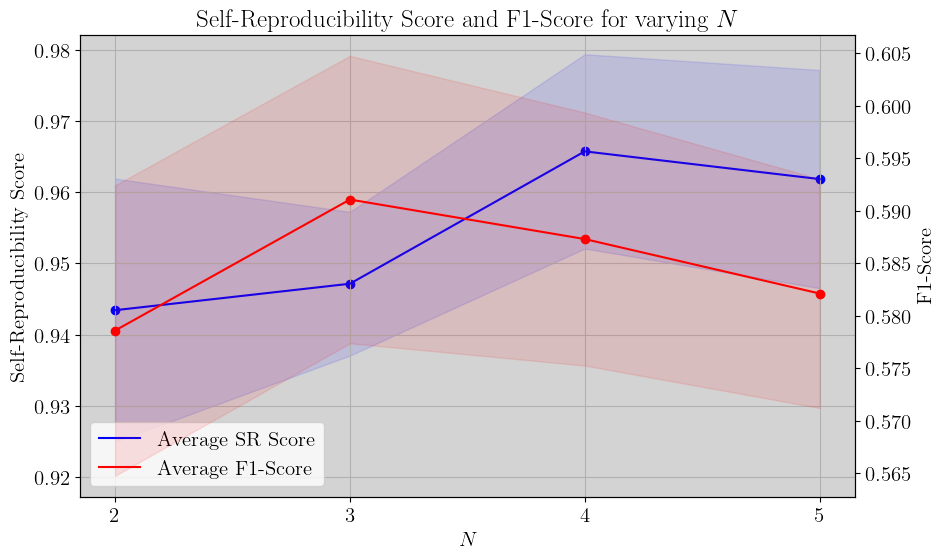

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 15,
    'font.family' : 'lmodern'
}
plt.rcParams.update(params)

# Two example lists with different y-values
list1 = df_ordered.iloc[-1].tolist()
list2 = df_acuracy.iloc[:, column_order].iloc[-1].tolist()

# Create x-axis values (assuming the lists have the same length)
x = ['2', '3', '4', '5']

# Create the figure and the first y-axis (left-hand side)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(x, list1, 'b-', label='Average SR Score')
ax1.scatter(x, list1, color='b')
ax1.fill_between(x, np.array(list1) - df_var_rep.iloc[-1], np.array(list1) + df_var_rep.iloc[-1], color='b', alpha=0.1)
ax1.set_xlabel('$N$')
ax1.set_ylabel('Self-Reproducibility Score')

# Create the second y-axis (right-hand side)
ax2 = ax1.twinx()
ax2.plot(x, list2, 'r-', label='Average F1-Score')
ax2.fill_between(x, np.array(list2) - df_var.iloc[:, column_order].iloc[-1], np.array(list2) + df_var.iloc[:, column_order].iloc[-1], color='r', alpha=0.1)
ax2.scatter(x, list2, color='r')
ax2.set_ylabel('F1-Score')

# Add legend
lines = ax1.get_lines() + ax2.get_lines()

# Add grid
ax1.grid(True)

# Extend the right-hand side y-axis slightly downward
ax1.set_ylim(ax1.get_ylim()[0] - 0.005, ax1.get_ylim()[1])

# Adjust legend position using bbox_to_anchor
ax1.legend(lines, [line.get_label() for line in lines], loc='lower left', bbox_to_anchor=(0, 0))

# Set grey background
ax1.set_facecolor('lightgrey')
ax1.set_title("Self-Reproducibility Score and F1-Score for varying $N$")
plt.savefig('Self-Reproducibility Score and F1-Score for varying N.pdf', format='pdf')
plt.show()